In [35]:
#Importing libraries
import os
from os import listdir
from PIL import Image as PImage
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.image as img
import PIL as Image
from keras.preprocessing.image import ImageDataGenerator
import sys
import cv2
import numpy as np
import glob
from keras.callbacks import TensorBoard
print(sys.version)

3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]


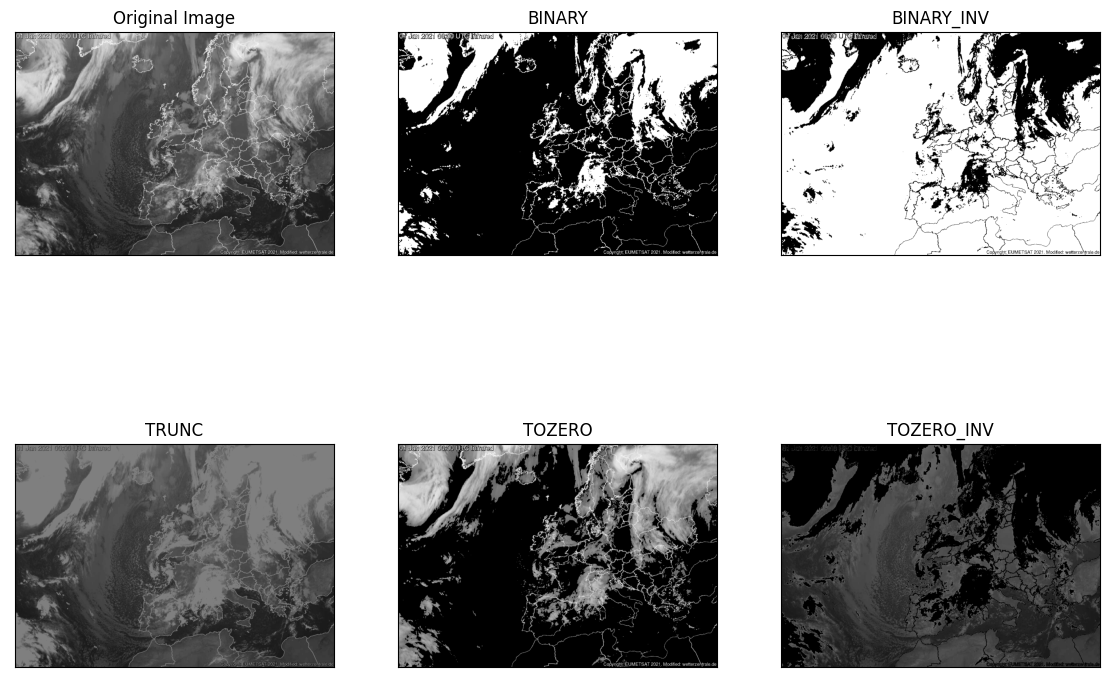

In [36]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(14,10), 'figure.dpi':100})

img = cv2.imread('./Images/1.01.2021 00-00.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [37]:
# Thresholding using THRESH_TOZERO

import os
import sys
from pathlib import Path

if __name__ == "__main__":
    #get alpha and beta values
    alpha, beta =2, -420
    # get directory path where the images are stored
    image_dir = "./Images/"
    # get directory path where you want to save the images
    output_dir = "./BWimages/"
    #iterate through all the files in the image directory
    for _, _, image_names in os.walk(image_dir):
        #iterate through all the files in the image_dir
        for image_name in image_names:
            # check for extension .jpg
            if '.jpg' in image_name:
                # get image read path(path should not contain spaces in them)
                filepath = os.path.join(image_dir, image_name)
                # get image write path
                dstpath = os.path.join(output_dir, image_name)
                print(filepath, dstpath)
                # read the image
                image = cv2.imread(filepath)
                # do the processing
                th, dst = cv2.threshold(image,127,255, cv2.THRESH_TOZERO)
                # write the image in a different path with the same name
                cv2.imwrite(dstpath, dst)


./Images/1.01.2021 00-00.jpg ./BWimages/1.01.2021 00-00.jpg
./Images/1.01.2021 03-00.jpg ./BWimages/1.01.2021 03-00.jpg
./Images/1.01.2021 06-00.jpg ./BWimages/1.01.2021 06-00.jpg
./Images/1.01.2021 09-00.jpg ./BWimages/1.01.2021 09-00.jpg
./Images/1.01.2021 12-00.jpg ./BWimages/1.01.2021 12-00.jpg
./Images/1.01.2021 15-00.jpg ./BWimages/1.01.2021 15-00.jpg
./Images/1.01.2021 18-00.jpg ./BWimages/1.01.2021 18-00.jpg
./Images/1.01.2021 21-00.jpg ./BWimages/1.01.2021 21-00.jpg
./Images/10.01.2021 00-00.jpg ./BWimages/10.01.2021 00-00.jpg
./Images/10.01.2021 03-00.jpg ./BWimages/10.01.2021 03-00.jpg
./Images/10.01.2021 06-00.jpg ./BWimages/10.01.2021 06-00.jpg
./Images/10.01.2021 09-00.jpg ./BWimages/10.01.2021 09-00.jpg
./Images/10.01.2021 12-00.jpg ./BWimages/10.01.2021 12-00.jpg
./Images/10.01.2021 15-00.jpg ./BWimages/10.01.2021 15-00.jpg
./Images/10.01.2021 18-00.jpg ./BWimages/10.01.2021 18-00.jpg
./Images/10.01.2021 21-00.jpg ./BWimages/10.01.2021 21-00.jpg
./Images/11.01.2021 00-0

./Images/25.01.2021 15-00.jpg ./BWimages/25.01.2021 15-00.jpg
./Images/25.01.2021 18-00.jpg ./BWimages/25.01.2021 18-00.jpg
./Images/25.01.2021 21-00.jpg ./BWimages/25.01.2021 21-00.jpg
./Images/26.01.2021 00-00.jpg ./BWimages/26.01.2021 00-00.jpg
./Images/26.01.2021 03-00.jpg ./BWimages/26.01.2021 03-00.jpg
./Images/26.01.2021 06-00.jpg ./BWimages/26.01.2021 06-00.jpg
./Images/26.01.2021 09-00.jpg ./BWimages/26.01.2021 09-00.jpg
./Images/26.01.2021 12-00.jpg ./BWimages/26.01.2021 12-00.jpg
./Images/26.01.2021 15-00.jpg ./BWimages/26.01.2021 15-00.jpg
./Images/26.01.2021 18-00.jpg ./BWimages/26.01.2021 18-00.jpg
./Images/26.01.2021 21-00.jpg ./BWimages/26.01.2021 21-00.jpg
./Images/27.01.2021 00-00.jpg ./BWimages/27.01.2021 00-00.jpg
./Images/27.01.2021 03-00.jpg ./BWimages/27.01.2021 03-00.jpg
./Images/27.01.2021 06-00.jpg ./BWimages/27.01.2021 06-00.jpg
./Images/27.01.2021 09-00.jpg ./BWimages/27.01.2021 09-00.jpg
./Images/27.01.2021 12-00.jpg ./BWimages/27.01.2021 12-00.jpg
./Images

In [38]:
#Creating video out of every picture
 
img_array = []
for filename in glob.glob('./BWimages/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('./Video/video.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [39]:
# Capturing the video file
capture = cv2.VideoCapture("./Video/video.mp4")

# Reading the first frame
_, frame1 = capture.read()
# Convert to gray scale
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
# Create mask
hsv_mask = np.zeros_like(frame1)
# Make image saturation to a maximum value
hsv_mask[..., 1] = 255

# Till you scan the video

while (1):

    # Capture another frame and convert to gray scale
    _, frame2 = capture.read()
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Optical flow is now calculated
    #flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 5, 11, 5, 5, 1.1, 0)
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 5, 5, 3, 5, 1.1, 0)
    # Compute magnite and angle of 2D vector
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Set image hue value according to the angle of optical flow
    hsv_mask[..., 0] = ang * 180 / np.pi / 2
    # Set value as per the normalized magnitude of optical flow
    hsv_mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    # Convert to rgb
    rgb_representation = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2', rgb_representation)
    kk = cv2.waitKey(20) & 0xff
    # Press 'e' to exit the video
    if kk == ord('e'):
        break
    # Press 's' to save the video
    elif kk == ord('s'):
        cv2.imwrite('./Results/Optical_image.png', frame2)
        cv2.imwrite('./Results/HSV_converted_image.png', rgb_representation)
    prvs = next

capture.release()
cv2.destroyAllWindows()

In [40]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(prvs,None) #kp1 and kp2 are keypoints and des1 and des2 are the descriptors
kp2, des2 = sift.detectAndCompute(next,None)

True

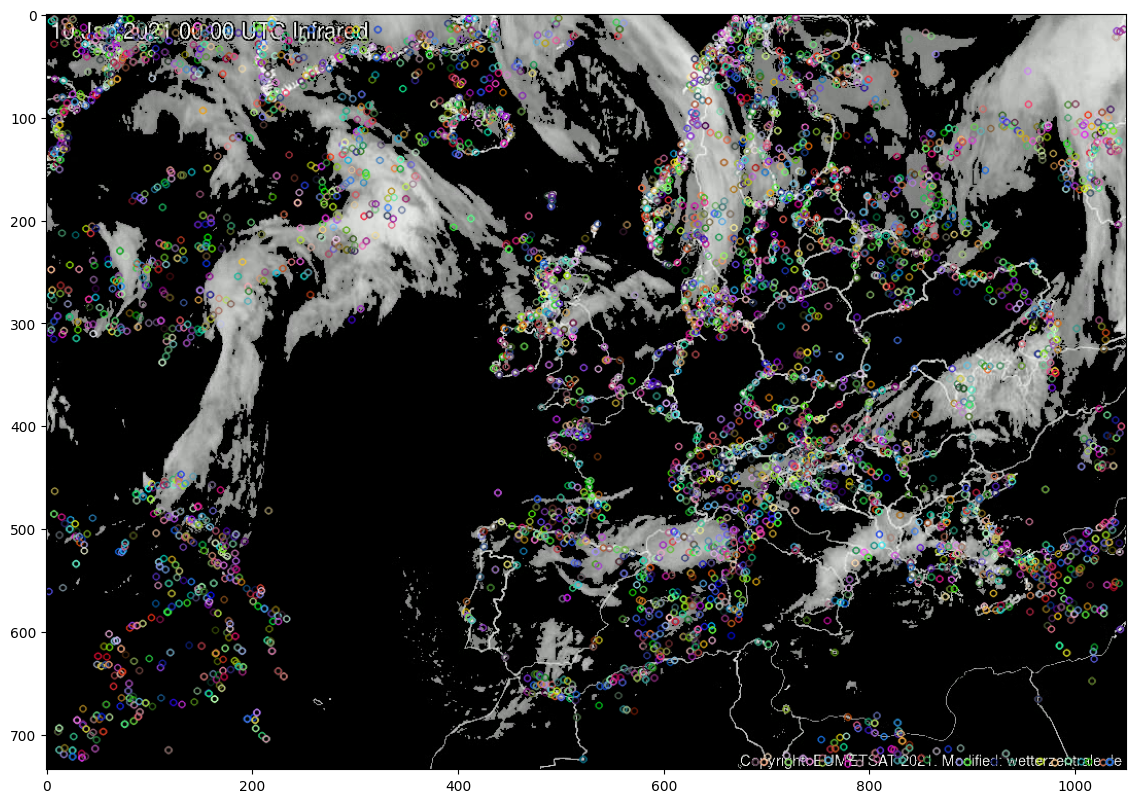

In [41]:
plt.rcParams["figure.figsize"] = [16,10]
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(frame2,kp1,None), cv2.COLOR_BGR2RGB)) #draw the keypoints on the image
cv2.imwrite("./Results/keypoints.jpg", cv2.drawKeypoints(frame2,kp1,None)) #save image to local computer

In [42]:
%%time
new_path = "./BWimages/"


imagesList = os.listdir(new_path)

training_data = np.array([img_to_array(load_img(new_path+image)) for image in imagesList])

Wall time: 2.62 s


In [43]:
len(imagesList)

248

In [44]:
training_data.shape

(248, 735, 1050, 3)

In [45]:
training_data = np.divide(training_data,255)

In [46]:
train_len = int(np.floor(len(training_data)*0.75))
test_len = int(np.floor((len(training_data)-train_len) * 0.5))
val_len = int(len(training_data)-test_len-train_len)

print(train_len,test_len,val_len)

186 31 31


In [47]:
train_split = training_data[0:train_len]
test_split = training_data[train_len:train_len+test_len]
val_split = training_data[train_len+test_len:len(training_data)]

In [48]:
len(train_split)%8

2

In [49]:
train_split = np.delete(train_split,[i for i in range(len(train_split)%8)],axis=0)
test_split = np.delete(test_split,[i for i in range(len(test_split)%8)],axis=0)
val_split = np.delete(val_split,[i for i in range(len(val_split)%8)],axis=0)

In [50]:
%%time
week_data_train = []
while(len(train_split)>6):
    week = np.array([train_split[k] for k in range(8)])
    week_data_train.append(week)
    train_split = np.delete(train_split,[i for i in range(8)],axis=0)
    
week_data_train = np.array(week_data_train)

Wall time: 6.14 s


In [51]:
%%time
week_data_test = []
while(len(test_split)>6):
    week = np.array([test_split[k] for k in range(8)])
    week_data_test.append(week)
    test_split = np.delete(test_split,[i for i in range(8)],axis=0)
    
week_data_test = np.array(week_data_test)

Wall time: 209 ms


In [52]:
week_data_train.shape

(23, 8, 735, 1050, 3)

In [53]:
X = week_data_train[0:len(week_data_train)-1]
Y = week_data_train[1:len(week_data_train)]

X_val = week_data_test[0:len(week_data_test)-1]
y_val = week_data_test[1:len(week_data_test)]

In [54]:
conv_model = Sequential()
conv_model.add(ConvLSTM2D(3,kernel_size=(3,3),input_shape=(8, 735, 1050, 3),padding='same', return_sequences=True,go_backwards=True))
conv_model.add(ConvLSTM2D(3,kernel_size=(3,3),padding='same', return_sequences=True,go_backwards=True))

conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2 (ConvLSTM2D)  (None, 8, 735, 1050, 3)   660       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 8, 735, 1050, 3)   660       
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [55]:
conv_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
               metrics=['accuracy']
                  )

In [56]:
%%time
history = conv_model.fit(X, Y,
                epochs=30,
                batch_size = 4,
                shuffle = False
                ,validation_data=(X_val, y_val)
               )

Epoch 1/30
6/6 [==============================] - 173s 26s/step - loss: 1.7097 - accuracy: 0.1283 - val_loss: 0.9141 - val_accuracy: 0.1273
Epoch 2/30
6/6 [==============================] - 157s 26s/step - loss: 0.9513 - accuracy: 0.1273 - val_loss: 0.7187 - val_accuracy: 0.1432
Epoch 3/30
6/6 [==============================] - 163s 26s/step - loss: 0.7504 - accuracy: 0.1413 - val_loss: 0.6119 - val_accuracy: 0.1317
Epoch 4/30
6/6 [==============================] - 164s 27s/step - loss: 0.6399 - accuracy: 0.1278 - val_loss: 0.5513 - val_accuracy: 0.0978
Epoch 5/30
6/6 [==============================] - 167s 27s/step - loss: 0.5783 - accuracy: 0.0934 - val_loss: 0.5210 - val_accuracy: 0.0842
Epoch 6/30
6/6 [==============================] - 166s 27s/step - loss: 0.5463 - accuracy: 0.0817 - val_loss: 0.5029 - val_accuracy: 0.0722
Epoch 7/30
6/6 [==============================] - 159s 26s/step - loss: 0.5262 - accuracy: 0.0699 - val_loss: 0.4893 - val_accuracy: 0.0611
Epoch 8/30
6/6 [====

In [57]:
conv_model.save('CNN_LSTM_bidirectional_30epochs.h5')

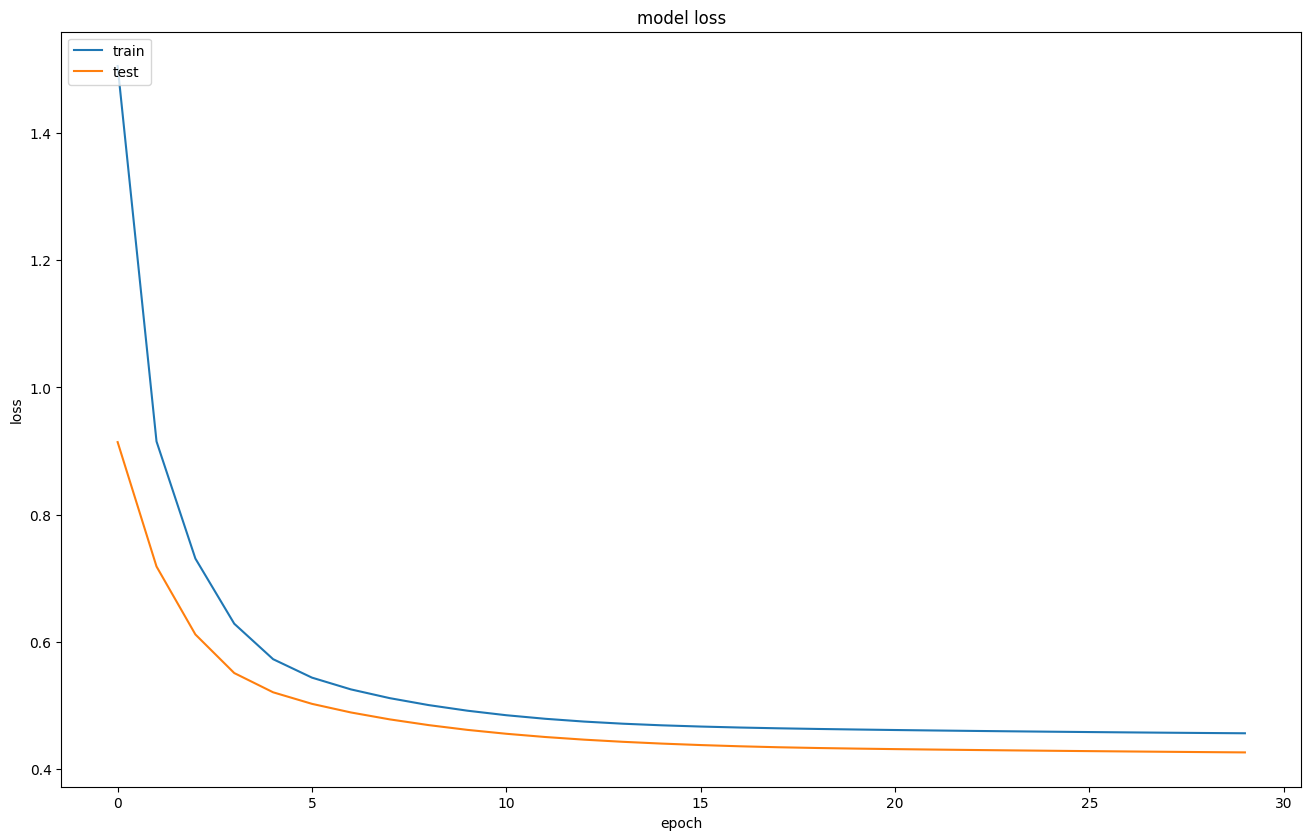

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
predict_img = conv_model.predict(X[0:1])
real_img = Y[0:1]

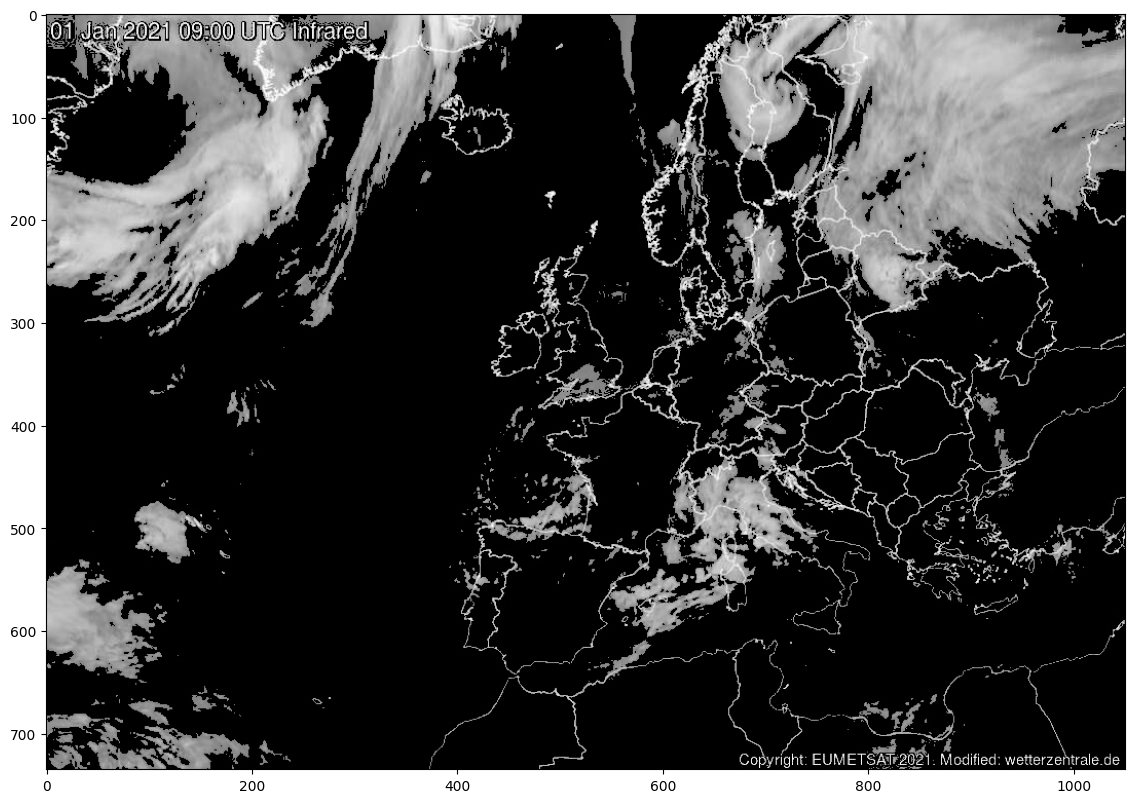

In [60]:
imgplot = plt.imshow(X[0,1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


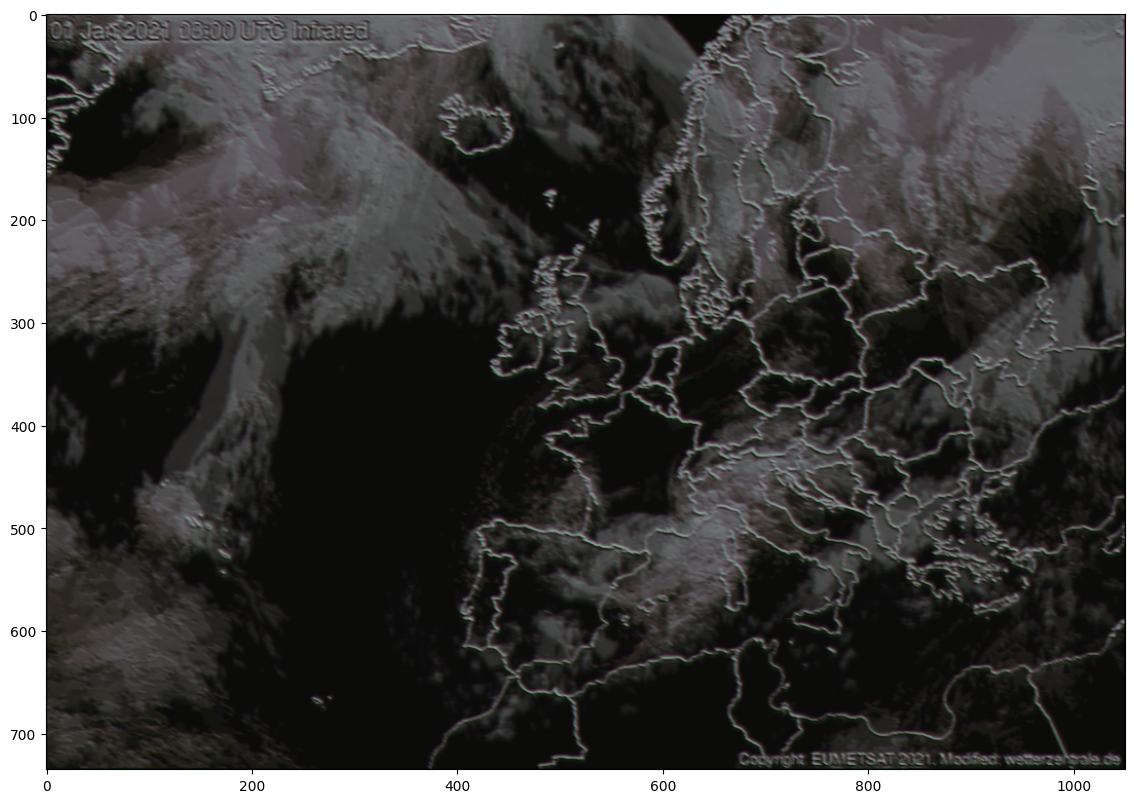

In [61]:
imgplot = plt.imshow(predict_img[0,1])
plt.show()

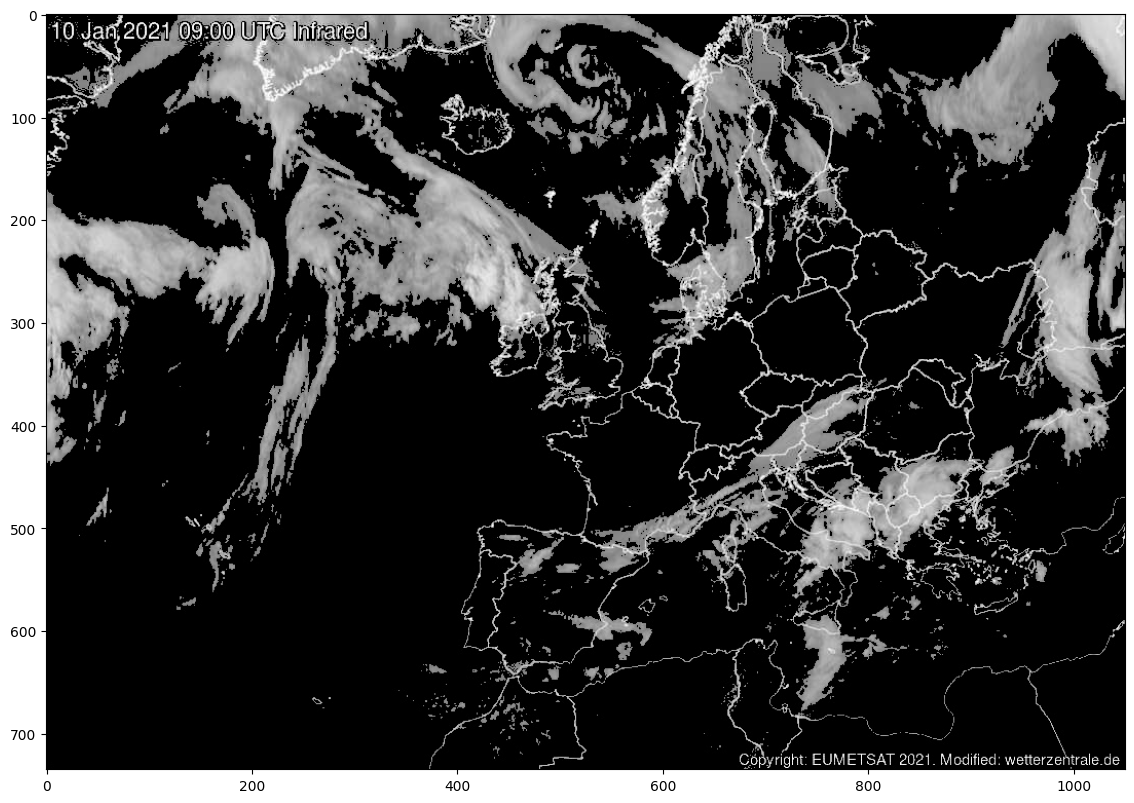

In [62]:
imgplot = plt.imshow(real_img[0,1])
plt.show()